In [1]:
using Causality, IntervalUnionArithmetic

┌ Info: Precompiling Causality [943c2df0-3341-4665-8895-8aff0dd63d80]
└ @ Base loading.jl:1423
┌ Warning: Package CRlibm does not have Libdl in its dependencies:
│ - If you have CRlibm checked out for development and have
│   added Libdl as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with CRlibm
└ Loading Libdl into CRlibm from project dependency, future warnings for CRlibm are suppressed.
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for IntervalArithmetic [d1acc4aa-44c8-5952-acd4-ba5d80a2a253]
│   exception = Required dependency CRlibm [96374032-68de-5a5b-8d9e-752f78720389] failed to load from a cache file.
└ @ Base loading.jl:1132
┌ Warning: Package CRlibm does not have Libdl in its dependencies:
│ - If you have CRlibm checked out for development and have
│   added Libdl as a dependency but haven't updated your primary
│   environment's manifes

In [19]:
T, N = 20., 50
ρ = 3/N
G = Causality.makeGNP(N,ρ)

{50, 150} directed sparse Int64 graph
⠀⠀⠀⠀⠀⢐⠀⠠⠀⡀⠀⠀⠁⠂⠐⠘⠀⠀⠁⠀⠀⠁⠀⠠⠀
⠀⠀⠀⠀⠄⠐⠄⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠂⠀⠀⠀
⢀⢀⢀⠁⠀⠀⠀⠀⡀⠀⠂⠀⠈⠀⠂⠀⠄⠀⠀⠀⠘⡠⠀⡀⠀
⠀⡀⠠⠁⠀⠀⠄⠁⠀⠀⠀⠀⠀⠈⠀⠀⠀⠄⠀⠉⠄⡀⠌⡄⠀
⠀⠠⠀⠀⠀⠈⠀⠀⠀⠀⡀⠄⠑⠀⠀⠀⠐⠀⠄⠀⠠⢁⠀⠐⠀
⠀⠀⠀⠀⠈⠀⠀⠀⠀⠌⠀⠀⠡⠂⠀⠀⠂⠀⠄⠐⠠⠀⡀⠀⠡
⠡⠀⠀⠀⠂⠀⡀⠀⠑⠀⠡⠂⠀⠀⢂⠀⠀⠀⠄⠀⠈⠀⠀⠂⠀
⣐⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠈⠐⠀⡠⠂⠀⠀⠀⠠⠀⠠⠀⠀
⠀⠀⠀⠀⠀⠁⠀⠄⠐⠀⠈⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀
⠁⠀⡀⠀⠀⠀⡄⠀⠀⠁⢀⠁⠀⠁⠀⠀⠀⠀⠄⠁⠀⠀⠀⠈⠀
⠄⠀⠠⠀⠒⡠⠀⠡⠄⢂⠀⠂⠂⠀⠀⠂⠀⠀⠀⠀⠀⠀⠀⠒⠈
⠀⡀⠀⠀⠀⠠⠂⠥⢀⠀⠀⠈⠠⠀⠀⠂⢀⠀⡀⠀⢠⠀⠀⠀⠄
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠂⠀⠀⠀⠀⠀⠀⠀⠀⠂⠀⠀⠁⠀

In [20]:
getpargen(pseed, autoinf::GaussianRate, inf_out::GaussianRate, lat_gen::GaussianRate, rec_gen::GaussianRate) = 
    [pseed autoinf.a autoinf.b autoinf.c inf_out.a inf_out.b inf_out.c lat_gen.a lat_gen.b lat_gen.c rec_gen.a rec_gen.b rec_gen.c]

getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate, latency::GaussianRate, recov::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
     fill(latency.a, 1, N); fill(latency.b, 1, N); fill(latency.c, 1, N);
     fill(recov.a, 1, N); fill(recov.b, 1, N); fill(recov.c, 1, N)
    ]

getpar (generic function with 1 method)

In [21]:
#Initialize generation parameters
ε = 1e-10
λ = 0.6

pseed = 10/N 
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
latency = GaussianRate(1., T/2, 1/ε)
recov = GaussianRate(1., T/2, 1/ε)

inf_out = GaussianRate(λ, 4., 3.)
l_delay = GaussianRate(10000., 2., 3.)
r_delay = GaussianRate(0., 6., 4.)

θp = getpar(pseed, autoinf, inf_in, latency, recov);
θpgen = getpargen(pseed, autoinf, inf_out, l_delay, r_delay);

In [22]:
#Initialize min/max boundaies
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min, rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max, rate_max, rate_max);

rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(3.  ,  T,   T)

θgenmin = getpargen(pseed_min, rate_min, rate_min, rate_min, rate_min);
θgenmax = getpargen(pseed_max, rate_max, rate_max, rate_max, rate_max);

In [23]:
const Igauss = GaussianInferentialSEIR
const Igen = GenerativeSEIR{GaussianRate,GaussianRate,GaussianRate,GaussianRate} 

GenerativeSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}

In [24]:
Mp = StochasticModel(Igen, T, θp, G, θpgen);
sample! = Sampler(Mp);

In [25]:
xtrue = zeros(N,3)
sample!(xtrue)
nobs, p = 50, 1e-6
O = [(ti = T*(1+rand())/2; (i,xtrue[i,2] < ti < xtrue[i,3],ti,p)) for i=1:nobs]
[o for o in O if o[2]==1]

45-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 1, 10.367689856592976, 1.0e-6)
 (2, 1, 12.355433399757771, 1.0e-6)
 (3, 1, 13.593752396856104, 1.0e-6)
 (4, 1, 14.914969098563088, 1.0e-6)
 (6, 1, 11.276711227577273, 1.0e-6)
 (7, 1, 10.59381028327817, 1.0e-6)
 (9, 1, 10.057627126828166, 1.0e-6)
 (10, 1, 13.28199112987793, 1.0e-6)
 (11, 1, 16.942446690756633, 1.0e-6)
 (12, 1, 18.910618872654545, 1.0e-6)
 (13, 1, 12.119111779944182, 1.0e-6)
 (15, 1, 10.987861506375669, 1.0e-6)
 (16, 1, 17.27776324040024, 1.0e-6)
 ⋮
 (39, 1, 12.491057823290511, 1.0e-6)
 (40, 1, 11.562348079195985, 1.0e-6)
 (41, 1, 13.046368668093432, 1.0e-6)
 (42, 1, 17.04718433372696, 1.0e-6)
 (43, 1, 11.68021285343962, 1.0e-6)
 (44, 1, 14.711401696811796, 1.0e-6)
 (45, 1, 12.071886702856442, 1.0e-6)
 (46, 1, 19.615380976121592, 1.0e-6)
 (47, 1, 16.122451162167888, 1.0e-6)
 (48, 1, 16.395299960485698, 1.0e-6)
 (49, 1, 14.416687725848561, 1.0e-6)
 (50, 1, 16.379868299053555, 1.0e-6)

In [49]:
#Initialize softened model
T = Float64(T)
ε = 2e-3

#inf_out = GaussianRate(1/2, T/2, 6.)
#l_delay = GaussianRate(1/2, 7., 5.)
#r_delay = GaussianRate(1/2, , 4.)

autoinf = GaussianRate(ε, T/2, 1/ε)

θp2gen = getpargen(pseed, autoinf, inf_out, l_delay, r_delay);

θp2 = getpar(pseed, autoinf, inf_in, latency, recov);
Mp2 = StochasticModel(I, T, θp2, G, θp2gen);

In [50]:
#Initialize the parameters to learn

autoinf = GaussianRate(1/N, T/2, 2T)
inf_in = GaussianRate(1.0, T/2, 2T)
latency = GaussianRate(1., T/2, 2T)
recov = GaussianRate(1., T/2, 2T)


θ = getpar(pseed, autoinf, inf_in,  latency, recov);
M = StochasticModel(I, T, θ, G, θp2gen);

In [51]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
         hyperdescender=SignDescender(0.),learnhyper=1);

Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:09
  F:  7.45186952821887

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
      [1] [0m[1mreshape[22m
    [90m    @ [39m[90m./[39m[90m[4mreshapedarray.jl:51[24m[39m[90m [inlined][39m
      [2] [0m[1mreshape[22m
    [90m    @ [39m[90m./[39m[90m[4mreshapedarray.jl:111[24m[39m[90m [inlined][39m
      [3] [0m[1mreshape[22m
    [90m    @ [39m[90m./[39m[90m[4mreshapedarray.jl:141[24m[39m[90m [inlined][39m
      [4] [0m[1m_maybe_reshape_parent[22m
    [90m    @ [39m[90m./[39m[90m[4msubarray.jl:124[24m[39m[90m [inlined][39m
      [5] [0m[1mview[22m
    [90m    @ [39m[90m./[39m[90m[4msubarray.jl:178[24m[39m[90m [inlined][39m
      [6] [0m[1mmaybeview[22m
    [90m    @ [39m[90m./[39m[90m[4mviews.jl:146[24m[39m[90m [inlined][39m
      [7] [0m[1mindividual[22m[0m[1m([22m[90m#unused#[39m::[0mType[90m{GaussianInferentialSEIR}[39m, [90mθi[39m::[0mVector[90m{ForwardDiff.Dual{ForwardDiff.Tag{Causality.var"#31#32"{Matrix{Float64}, StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64}, Float64}, Float64, 7}}[39m, [90mθg[39m::[0mMatrix[90m{Float64}[39m[0m[1m)[22m
    [90m    @ [39m[35mCausality[39m [90m~/git/Causality/src/[39m[90m[4mseir.jl:23[24m[39m
      [8] [0m[1mindividual[22m[90m (repeats 2 times)[39m
    [90m    @ [39m[90m~/git/Causality/src/[39m[90m[4mstochasticmodel.jl:51[24m[39m[90m [inlined][39m
      [9] [0m[1m#31[22m
    [90m    @ [39m[90m~/git/Causality/src/[39m[90m[4mvariation.jl:85[24m[39m[90m [inlined][39m
     [10] [0m[1mchunk_mode_gradient![22m[0m[1m([22m[90mresult[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m, [90mf[39m::[0mCausality.var"#31#32"[90m{Matrix{Float64}, StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64}[39m, [90mx[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m, [90mcfg[39m::[0mForwardDiff.GradientConfig[90m{ForwardDiff.Tag{Causality.var"#31#32"{Matrix{Float64}, StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64}, Float64}, Float64, 7, Vector{ForwardDiff.Dual{ForwardDiff.Tag{Causality.var"#31#32"{Matrix{Float64}, StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64}, Float64}, Float64, 7}}}[39m[0m[1m)[22m
    [90m    @ [39m[36mForwardDiff[39m [90m~/.julia/packages/ForwardDiff/PBzup/src/[39m[90m[4mgradient.jl:150[24m[39m
     [11] [0m[1mgradient![22m
    [90m    @ [39m[90m~/.julia/packages/ForwardDiff/PBzup/src/[39m[90m[4mgradient.jl:39[24m[39m[90m [inlined][39m
     [12] [0m[1mgradient![22m[0m[1m([22m[90mresult[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m, [90mf[39m::[0mCausality.var"#31#32"[90m{Matrix{Float64}, StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64}[39m, [90mx[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m, [90mcfg[39m::[0mForwardDiff.GradientConfig[90m{ForwardDiff.Tag{Causality.var"#31#32"{Matrix{Float64}, StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64}, Float64}, Float64, 7, Vector{ForwardDiff.Dual{ForwardDiff.Tag{Causality.var"#31#32"{Matrix{Float64}, StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64}, Float64}, Float64, 7}}}[39m[0m[1m)[22m[90m (repeats 2 times)[39m
    [90m    @ [39m[36mForwardDiff[39m [90m~/.julia/packages/ForwardDiff/PBzup/src/[39m[90m[4mgradient.jl:35[24m[39m
     [13] [0m[1mgradient![22m[0m[1m([22m[90mdθ[39m::[0mMatrix[90m{Float64}[39m, [90mx[39m::[0mMatrix[90m{Float64}[39m, [90mM[39m::[0mStochasticModel[90m{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}[39m[0m[1m)[22m
    [90m    @ [39m[35mCausality[39m [90m~/git/Causality/src/[39m[90m[4mvariation.jl:85[24m[39m
     [14] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m~/git/Causality/src/[39m[90m[4mvariation.jl:54[24m[39m[90m [inlined][39m
     [15] [0m[1m(::Causality.var"#95#threadsfor_fun#28"{StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64, StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Vector{Tuple{Int64, Bool, Float64, Float64}}, Matrix{Float64}, Vector{Causality.var"#sample!#44"{StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Causality.var"#updateQ!#43"{StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, Vector{Int64}, Int64}}, Vector{Float64}, Vector{Vector{Tuple{Int64, Bool, Float64, Float64}}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Int64, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @ [39m[35mCausality[39m [90m./[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [16] [0m[1m(::Causality.var"#95#threadsfor_fun#28"{StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Int64, StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Vector{Tuple{Int64, Bool, Float64, Float64}}, Matrix{Float64}, Vector{Causality.var"#sample!#44"{StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, Causality.var"#updateQ!#43"{StochasticModel{GaussianInferentialSEIR, IndexedGraphs.IndexedBiDiGraph{Int64}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, Vector{Int64}, Int64}}, Vector{Float64}, Vector{Vector{Tuple{Int64, Bool, Float64, Float64}}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Int64, UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @ [39m[35mCausality[39m [90m./[39m[90m[4mthreadingconstructs.jl:52[24m[39m

In [52]:
θp2gen

1×13 Matrix{Float64}:
 0.2  0.002  10.0  20.0  0.6  4.0  3.0  3.0  2.0  3.0  1.0e-10  6.0  4.0

In [53]:
θpgen

1×13 Matrix{Float64}:
 0.2  1.0e-10  10.0  1.0e10  0.6  4.0  3.0  10000.0  2.0  3.0  0.0  6.0  4.0

In [54]:
function histo(v; bins=20, up=1.0)
    h = zeros(bins+1)
    z = length(v)
    for x in v
        h[floor(Int, x*bins/up)+1]+=1/z
    end
    h
end

histo (generic function with 1 method)

In [32]:
stats = post(Mp, O, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:01:28


In [55]:
statscau = prior(M);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


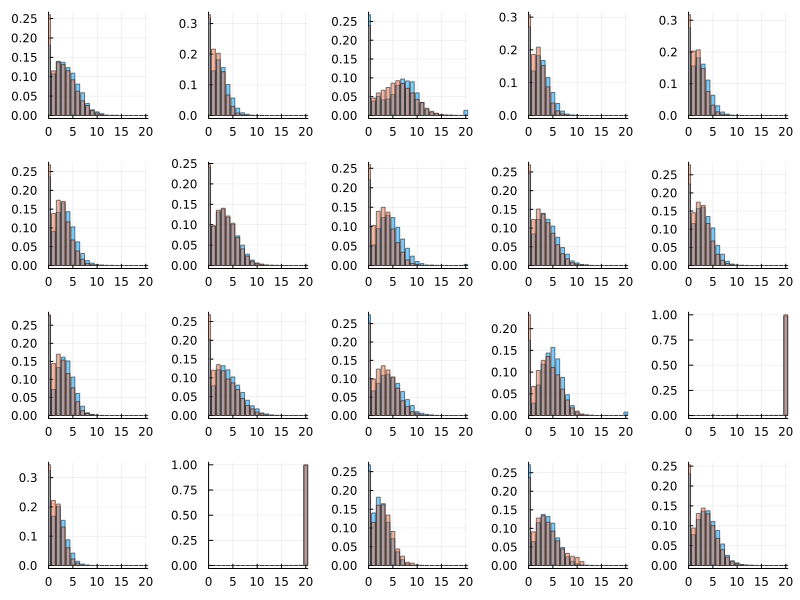

In [56]:
using Plots
state = 1
pl = map(22:41) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histo((@view statscau[:, k, state]), up=M.T), alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="cau", legend=false);
    bar!(p, 0:M.T/20:M.T, histo((@view stats[:, k, state]), up=M.T),    alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="true", legend=false);
end;
savefig("marginals.pdf")
plot(pl..., size=(800,600))

## Marginals and ROC curve

In [57]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum( stats[:,i,2] .< t .<= stats[:,i,3] ) / numsamp
end

function tpr(xtrue, rank) 
    den = sum(xtrue[rank])
    if den != 0
        return cumsum(xtrue[rank]) ./ den
    else
        return ones(size(rank))
    end
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

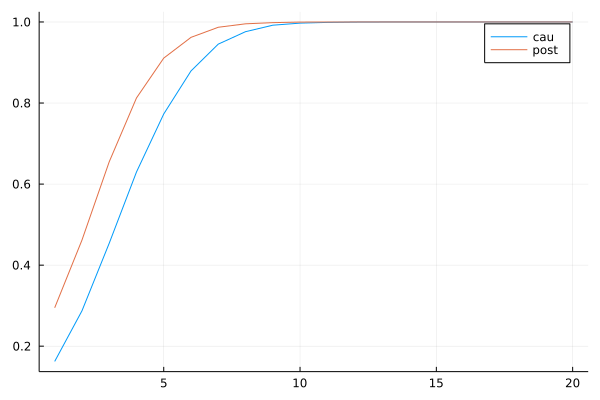

In [58]:
using Plots
p_cau = zeros(N,Int(T))
p_exact = zeros(N,Int(T))
for i = 1:N
    for t = 1:Int(T)
       p_cau[i,t] = marginal(i, t, statscau)
       p_exact[i,t] = marginal(i, t, stats)
    end
end
i = 2
plot(p_cau[i,1:end], label = "cau")
plot!(p_exact[i,1:end], label = "post")

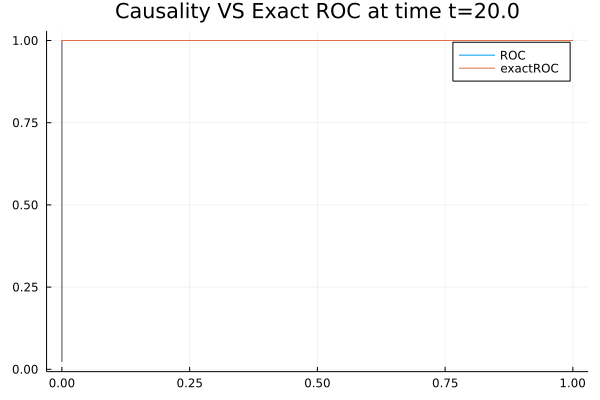

In [59]:
#Let us find the ROC of the infected individuals at time t
t = T
epidemic_risk=zeros(N)
true_risk=zeros(N)
for i=1:N
   epidemic_risk[i] = marginal(i,t,statscau)
   true_risk[i] = marginal(i,t,stats)
end
xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
plot(ROC(xt, epidemic_risk)[1],ROC(xt, epidemic_risk)[2], label="ROC", title="Causality VS Exact ROC at time t=$t")
plot!(ROC(xt, true_risk)[1],ROC(xt, true_risk)[2], label="exactROC")

In [60]:
p_cau

50×20 Matrix{Float64}:
 0.2626  0.4068  0.5749  0.7393  0.8616  …  1.0     1.0     1.0     1.0
 0.1624  0.2872  0.454   0.6298  0.773      1.0     1.0     1.0     1.0
 0.1964  0.2659  0.3662  0.4922  0.6328     0.9999  0.9999  0.9999  0.9999
 0.2006  0.275   0.3743  0.5098  0.6605     1.0     1.0     1.0     1.0
 0.0005  0.0007  0.0007  0.0008  0.0008     0.0063  0.01    0.0132  0.0184
 0.2069  0.3093  0.4539  0.6283  0.7809  …  1.0     1.0     1.0     1.0
 0.1673  0.2538  0.3751  0.5224  0.6675     0.9999  0.9999  0.9999  0.9999
 0.0009  0.0011  0.0011  0.0011  0.0011     0.0061  0.0078  0.009   0.0111
 0.1529  0.2092  0.305   0.4499  0.6382     1.0     1.0     1.0     1.0
 0.2015  0.3091  0.4477  0.6005  0.7466     1.0     1.0     1.0     1.0
 0.1768  0.2456  0.3163  0.4064  0.507   …  0.9979  0.9985  0.9986  0.9989
 0.2201  0.3658  0.5551  0.7393  0.8666     1.0     1.0     1.0     1.0
 0.3181  0.4685  0.6297  0.7719  0.8712     1.0     1.0     1.0     1.0
 ⋮                        

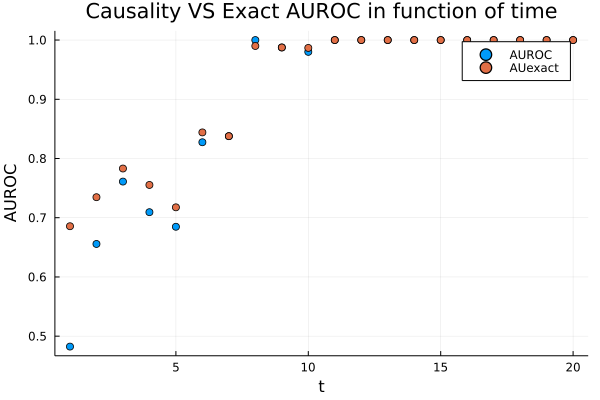

In [61]:
T = Int(T)
AU_curve=zeros(T)
AU_exact=zeros(T)
for t = 1:T
    epidemic_risk=zeros(N)
    true_risk=zeros(N)
    for i=1:N
       epidemic_risk[i] = marginal(i,t,statscau)
       true_risk[i] = marginal(i,t,stats)
    end
    xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
    AU_curve[t] = AUROC(ROC(xt, epidemic_risk))
    AU_exact[t] = AUROC(ROC(xt, true_risk))
end

scatter(LinRange(1,T,T),AU_curve, label="AUROC", title="Causality VS Exact AUROC in function of time")
scatter!(LinRange(1,T,T),AU_exact, label="AUexact")
T = Float64(T)
savefig("SEIR_AUROC.pdf")
xlabel!("t")
ylabel!("AUROC")